In [25]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [33]:
# 数据准备
target = 2
data_name = ['0618', '0854', '1066'][target - 1]
features_bgr1x1 = np.load(f'./Features/{data_name}_BGR1x1_featuers.npy')
features_hsv1x1 = np.load(f'./Features/{data_name}_HSV1x1_features.npy')
features_bgr3x3 = np.load(f'./Features/{data_name}_BGR3x3_featuers.npy')
features_hsv3x3 = np.load(f'./Features/{data_name}_HSV3x3_features.npy')
features_resnet = np.load(f'./Features/{data_name}_NN_features.npy').reshape(-1, 1)
features_hog = np.load(f'./Features/{data_name}_hog_featuers.npy').reshape(-1, 1)
features_gist = np.load(f'./Features/{data_name}_GIST_featuers.npy').reshape(-1, 1)

labels_bgr1x1 = np.load(f'./Features/{data_name}_BGR1x1_labels.npy')
labels_hsv1x1 = np.load(f'./Features/{data_name}_HSV1x1_labels.npy')
labels_bgr3x3 = np.load(f'./Features/{data_name}_BGR3x3_labels.npy')
labels_hsv3x3 = np.load(f'./Features/{data_name}_HSV3x3_labels.npy')
# labels_resnet = np.load(f'./Features/{data_name}_NN_labels.npy').reshape(-1, 1)
# labels_gist = np.load(f'./Features/{data_name}_GIST_labels.npy').reshape(-1, 1)
print(features_resnet.shape)
print(features_hog.shape)
print(features_gist.shape)


(512, 1)
(3326400, 1)
(128, 1)


In [27]:
def t_SNE(features, labels, title):
    tsne = TSNE(n_components=3, random_state=42)
    features_2d = tsne.fit_transform(features)
    
    plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='jet')  # labels 是你的样本标签
    plt.colorbar()  # 显示颜色条
    plt.title(f"{title}")
    plt.show()

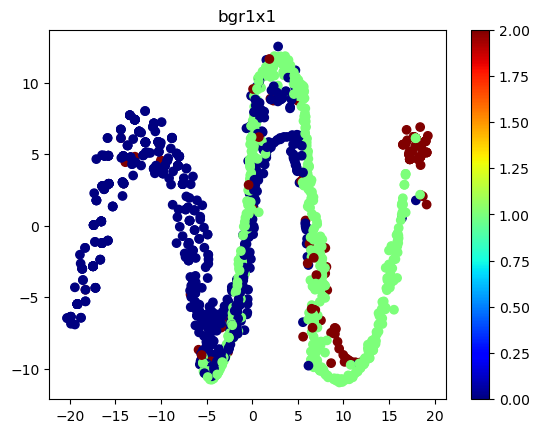

In [28]:
t_SNE(features_bgr1x1, labels_bgr1x1, 'bgr1x1')

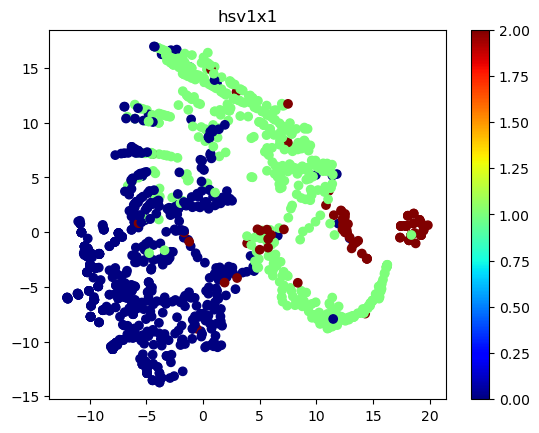

In [29]:
t_SNE(features_hsv1x1, labels_hsv1x1, 'hsv1x1')

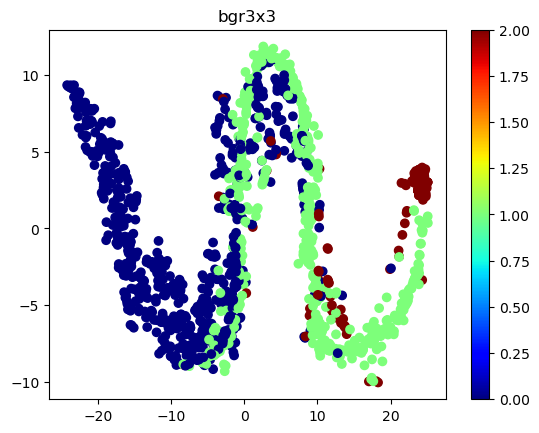

In [30]:
t_SNE(features_bgr3x3, labels_bgr3x3, 'bgr3x3')

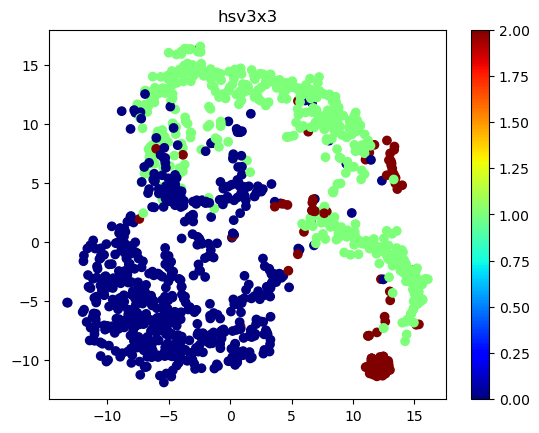

In [31]:
t_SNE(features_hsv3x3, labels_hsv3x3, 'hsv3x3')